In [ ]:
import numpy as np
from matplotlib.pyplot import *

In [ ]:
def e1(z, lam):
  return lam * np.abs(z) / 2
def e2(z, sig):
  return z**2 / (2 * sig**2)

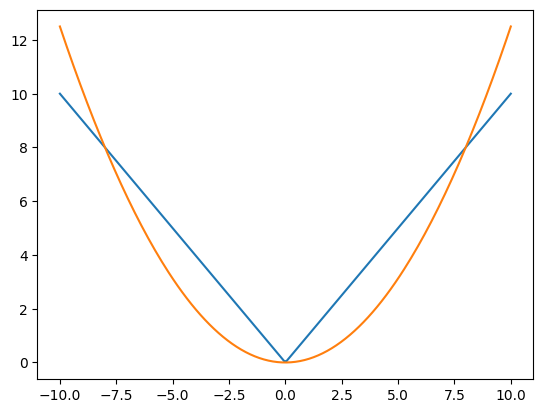

In [ ]:
zz = np.linspace(-10, 10, 200)
plot(zz, e1(zz, 2))
plot(zz, e2(zz, 2))

In [ ]:
rng = np.random.default_rng(42)
#print(rng.random(10))
def sam1(n, lam):
  return -lam * np.sign(rng.random(n) - 0.5) * np.log(rng.random(n))
def sam2(n, sig):
  return rng.normal(0, sig, size=n)

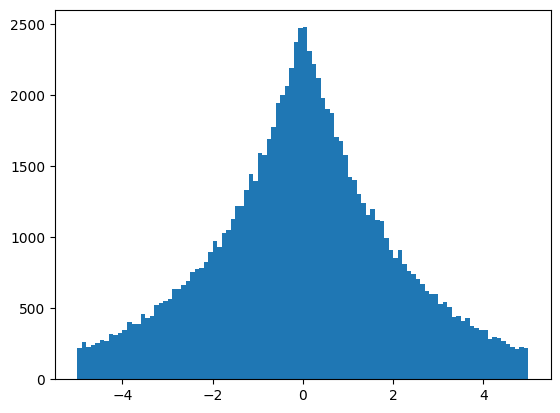

In [ ]:
z1 = sam1(100000, 2)
hist(z1, range=[-5,5], bins=100);

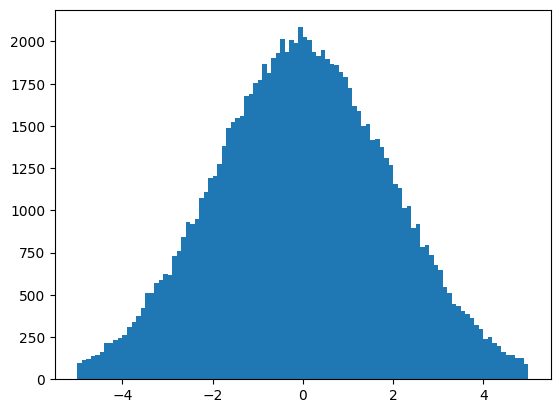

In [ ]:
z2 = sam2(100000, 2)
hist(z2, range=[-5,5], bins=100);

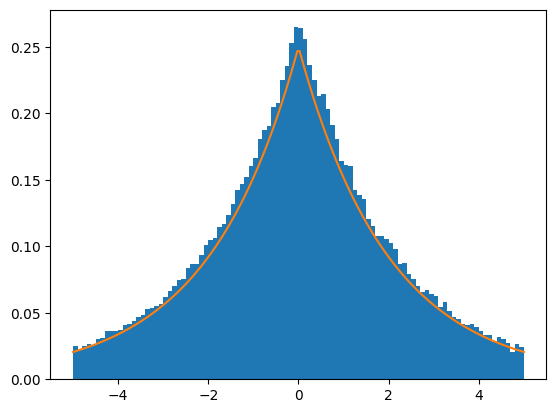

In [ ]:
lamb = 2
z1 = sam1(100000, lamb)
hist(z1, range=[-5,5], bins=100, density=True)
zz = np.linspace(-5, 5, 200)
plot(zz, 0.5/lamb*np.exp(-2/lamb**2*e1(zz, lamb)))

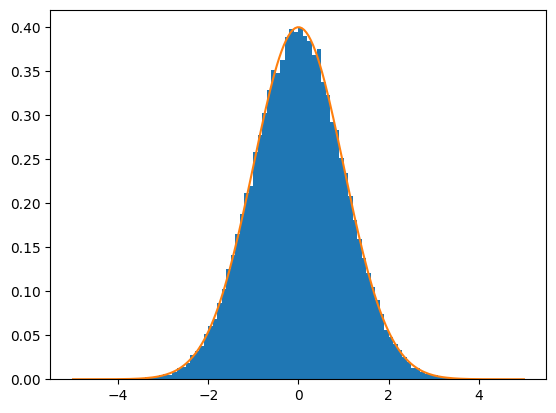

In [ ]:
sigm = 1
z2 = sam2(100000, sigm)
hist(z2, range=(-5,5), bins=100, density=True)
zz = np.linspace(-5, 5, 200)
plot(zz, 0.4/sigm*np.exp(-e2(zz, sigm)));

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True  True  True  True  True  True False  True
  True  True]


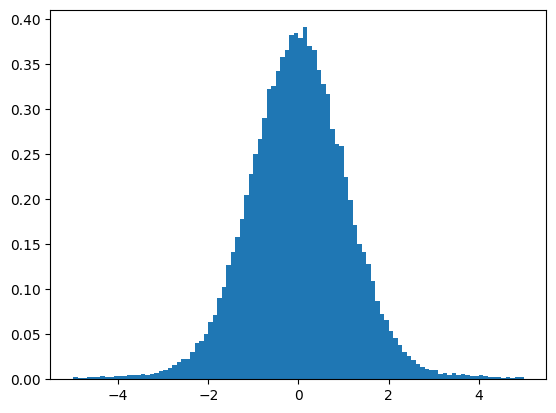

In [ ]:
n = 100000
lamb = 2
sigm = 1
epsilon = 0.1
z1 = sam1(n, lamb)
z2 = sam2(n, sigm)
chooser = rng.random(n) > epsilon
print(chooser[:50])
z = chooser * z2 + (1 - chooser) * z1
hist(z, range=[-5,5], bins=100, density=True);

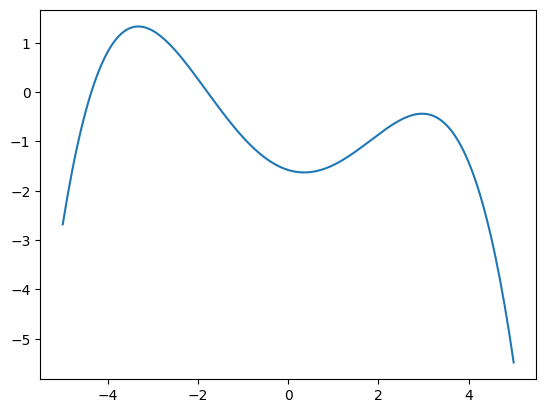

In [ ]:
def y(x):
  return (2*(x-1)**2 - (x**2-9)**2 - 10*x) / 50
xx = np.linspace(-5, 5, 200)
plot(xx, y(xx))

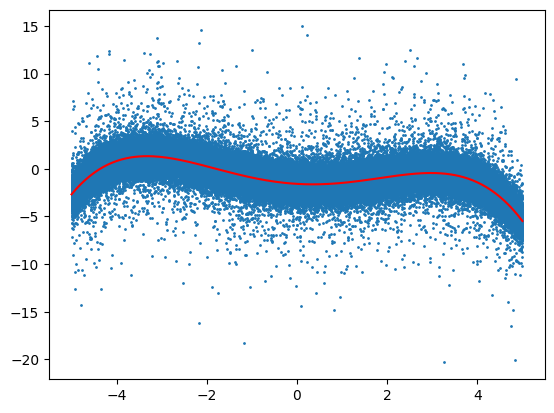

In [ ]:
x = rng.uniform(-5, 5, n)
t = y(x) + z
scatter(x, t, s=1)
plot(xx, y(xx), 'r-')

In [ ]:
u = x / 5
Phi = np.stack(([1]*n, u, u**2, u**3, u**4), axis=1)
w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ t
w

array([ -1.57728153,  -1.36250698,  10.02674762,  -0.05926171,
       -12.54964715])

In [ ]:
np.array([-79/50, -14/50*5, 2/5 * 5**2, 0 * 5**3, -1/50 * 5**4])

array([ -1.58,  -1.4 ,  10.  ,   0.  , -12.5 ])

In [ ]:
def mixed_noise(n, lamb=2, sigm=1, epsilon=0.1):
  z1 = sam1(n, lamb)
  z2 = sam2(n, sigm)
  chooser = rng.random(n) > epsilon
  return chooser * z2 + (1 - chooser) * z1

In [ ]:
val_x = rng.uniform(-5, 5, 1000)
val_t = y(val_x) + mixed_noise(1000)

In [ ]:
N = [10, 50, 100, 500, 1000]
K = 50

def sqr_error(pred_y, true_y):
  return np.mean((pred_y - true_y)**2)

def model(x, w):
  u = x/5
  return w[0] + w[1]*u + w[2]*u**2 + w[3]*u**3 + w[4]*u**4

for n in N:
  errors = []
  for _ in range(K):
    train_x = rng.uniform(-5, 5, size=n)
    train_t = y(train_x) + mixed_noise(n)
    u = train_x / 5
    Phi = np.stack(([1]*n, u, u**2, u**3, u**4), axis=1)
    w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ train_t
    err = sqr_error(model(val_x, w), val_t)
    errors.append(err)
  print(n, np.mean(errors))

10 190.30464569549832
50 1.6954489394934305
100 1.6118254528096536
500 1.522401750616608
1000 1.509731239921682


In [ ]:
np.mean((mixed_noise(1000000) **2))

1.6889615664001174